In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


In [51]:
df=pd.read_csv('Titanic-Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [52]:
Gender=[]
for i in range(len(df['Age'])):
    if df['Sex'][i]=='male':
        Gender.append(0)
    else:
        Gender.append(1)
    if np.isnan(df['Age'][i]):
        df.at[i, 'Age'] = 30
    if pd.isna(df['Embarked'][i]):
        df.at[i, 'Embarked'] = 'S'
Embarked=[]
for i in range(len(df['Age'])):
    if df['Embarked'][i]=='S':
        df.at[i, 'Embarked'] = 0
    else:
        df.at[i, 'Embarked'] = 1
df['Gender']=Gender
df=df.drop('Sex',axis=1)
df=df.drop('Cabin',axis=1)
df=df.drop('Name',axis=1)
df=df.drop('Ticket',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    object 
 8   Gender       891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [53]:
am=np.mean(df['Age'])
ae=df['Embarked'].mode().iloc[0]
am

29.758888888888887

In [54]:
df['Age'].isna().sum()

0

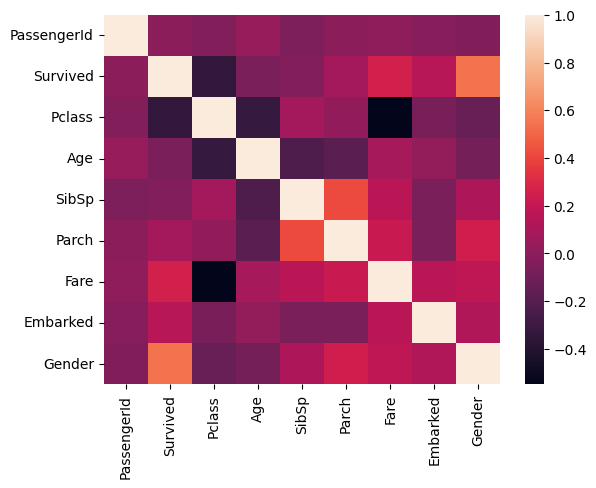

In [58]:
dataplot=sns.heatmap(df.corr()) 
plt.show()

In [60]:
X=df.drop('Survived',axis=1)
y=df.Survived
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45)


In [61]:
from sklearn.linear_model import LogisticRegression
print('Logistic Regression')

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Logistic Regression
Confusion Matrix : 
 [[102  15]
 [ 13  49]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       117
           1       0.77      0.79      0.78        62

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



In [63]:
from sklearn.linear_model import RidgeClassifier
print('Logistic Regression Ridge')

model = RidgeClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Logistic Regression Ridge
Confusion Matrix : 
 [[102  15]
 [ 14  48]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       117
           1       0.76      0.77      0.77        62

    accuracy                           0.84       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



In [72]:
from sklearn.svm import SVC
print('SVM Classifier Linear Kernel')

model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

SVM Classifier Linear Kernel
Confusion Matrix : 
 [[101  16]
 [ 14  48]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       117
           1       0.75      0.77      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [74]:
from sklearn.svm import SVC
print('SVM Classifier Polynomial Kernel')

model = SVC(kernel='poly')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

SVM Classifier Polynomial Kernel
Confusion Matrix : 
 [[108   9]
 [ 16  46]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       117
           1       0.84      0.74      0.79        62

    accuracy                           0.86       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.86      0.86      0.86       179



In [76]:
from sklearn.svm import SVC
print('SVM Classifier RBF Kernel')

model = SVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

SVM Classifier RBF Kernel
Confusion Matrix : 
 [[112   5]
 [ 17  45]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       117
           1       0.90      0.73      0.80        62

    accuracy                           0.88       179
   macro avg       0.88      0.84      0.86       179
weighted avg       0.88      0.88      0.87       179



In [78]:
from sklearn.svm import SVC
print('SVM Classifier Sigmoid Kernel')

model = SVC(kernel='sigmoid')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

SVM Classifier Sigmoid Kernel
Confusion Matrix : 
 [[90 27]
 [30 32]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       117
           1       0.54      0.52      0.53        62

    accuracy                           0.68       179
   macro avg       0.65      0.64      0.64       179
weighted avg       0.68      0.68      0.68       179



In [79]:
from sklearn.svm import NuSVC
print('Nu SVM Linear Kernel')

model = NuSVC(kernel='linear')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Nu SVM Linear Kernel
Confusion Matrix : 
 [[101  16]
 [ 14  48]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       117
           1       0.75      0.77      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [80]:
from sklearn.svm import NuSVC
print('Nu SVM Polynomial Kernel')

model = NuSVC(kernel='poly')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Nu SVM Polynomial Kernel
Confusion Matrix : 
 [[104  13]
 [ 16  46]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       117
           1       0.78      0.74      0.76        62

    accuracy                           0.84       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



In [82]:
from sklearn.svm import NuSVC
print('Nu SVM RBF Kernel')

model = NuSVC(kernel='rbf')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Nu SVM RBF Kernel
Confusion Matrix : 
 [[104  13]
 [ 14  48]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       117
           1       0.79      0.77      0.78        62

    accuracy                           0.85       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.85      0.85      0.85       179



In [83]:
from sklearn.svm import NuSVC
print('Nu SVM Sigmoid Kernel')

model = NuSVC(kernel='sigmoid')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ('Classification Report : ')
print (classification_report(y_test, y_pred))

Nu SVM Sigmoid Kernel
Confusion Matrix : 
 [[105  12]
 [ 35  27]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.90      0.82       117
           1       0.69      0.44      0.53        62

    accuracy                           0.74       179
   macro avg       0.72      0.67      0.68       179
weighted avg       0.73      0.74      0.72       179

